# This project works with SQL and we run queries to investigate the table. The goal of the project is to investigate data from the CIA World Factbook and the data was on Github and subsequently, Dataquest. The data contains demographic information about numerous countries including population, area, and growth.

# Importing the libraries and initial analysis.

In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [3]:
conn = sqlite3.connect('factbook.db')
c = conn.cursor()

In [4]:
c.execute('SELECT * FROM facts LIMIT 5;')

In [5]:
# getting the first five rows
first_five = c.fetchall()
print(first_five)

[(1, 'af', 'Afghanistan', 652230, 652230, 0, 32564342, 2.32, 38.57, 13.89, 1.51), (2, 'al', 'Albania', 28748, 27398, 1350, 3029278, 0.3, 12.92, 6.58, 3.3), (3, 'ag', 'Algeria', 2381741, 2381741, 0, 39542166, 1.84, 23.67, 4.31, 0.92), (4, 'an', 'Andorra', 468, 468, 0, 85580, 0.12, 8.13, 6.96, 0.0), (5, 'ao', 'Angola', 1246700, 1246700, 0, 19625353, 2.78, 38.78, 11.49, 0.46)]


In [6]:
# Reading in our query through Pandas in order to have a more visually
# appealing display of results.

q = 'SELECT * FROM facts LIMIT 5;'
pd.read_sql_query(q, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [7]:
# writing a query that returns the minimum and maximum population
# as well as the minimum and maximum population growth

query_1 = '''SELECT MIN(population) AS min_pop, MAX(population) AS max_pop,
             MIN(population_growth), MAX(population_growth)
             FROM facts;'''

pd.read_sql_query(query_1, conn)

,min_pop,max_pop,MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


#### Running the query resulted in a table that shows that apparently the minimum population and the growth are both zero. The growth is in percentage is the max growth is 4.02%

In [8]:
q2 = """
SELECT *
FROM facts
WHERE population = 0 OR population = 7256490011;
"""
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000.0,None,0,NaN,NaN,NaN,None
1,261,xx,World,None,NaN,None,7256490011,1.08,18.6,7.8,None


In second query that we ran, the result of 0 looked odd therefore we ran another query to look at those results closer and it appears that the Antartica has a population of 0 and the 7.2 billion was of the world.

#### Initial visualizations, frequency visualizations.

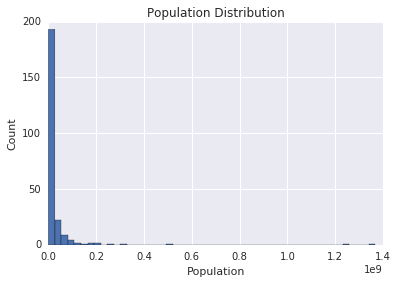

In [9]:
q3 = '''
SELECT population
FROM facts
WHERE population != 0 AND population != (SELECT MAX(population) FROM facts);
'''

pd.read_sql_query(q3, conn).hist(bins=50)
plt.xlabel('Population')
plt.ylabel('Count')
plt.title('Population Distribution')

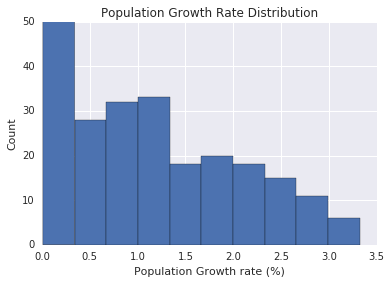

In [20]:
q4 = '''
SELECT population_growth
FROM facts
WHERE population_growth != 0 
AND population_growth != (SELECT MAX(population_growth) FROM facts);
'''

pd.read_sql_query(q4, conn).hist(bins=10)
plt.xlabel('Population Growth rate (%)')
plt.ylabel('Count')
plt.title('Population Growth Rate Distribution')

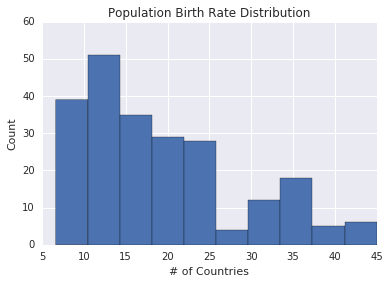

In [19]:
q5 = '''
SELECT birth_rate
FROM facts
WHERE birth_rate != 0 
AND birth_rate != (SELECT MAX(birth_rate) FROM facts);
'''

pd.read_sql_query(q5, conn).hist(bins=10)
plt.xlabel('# of Countries')
plt.ylabel('Count')
plt.title('Population Birth Rate Distribution')

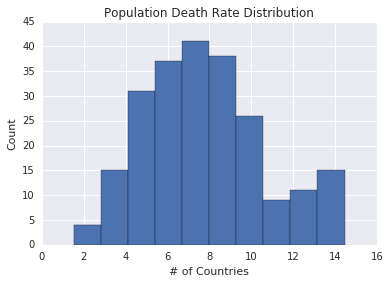

In [17]:
q6 = '''
SELECT death_rate
FROM facts
WHERE death_rate != 0 
AND death_rate != (SELECT MAX(death_rate) FROM facts);
'''

pd.read_sql_query(q6, conn).hist(bins=10)
plt.xlabel('# of Countries')
plt.ylabel('Count')
plt.title('Population Death Rate Distribution')

It is interesting to see that the death rate of the various populations from the table are almost on a bell shape curve, whereas the others are not.

In [13]:
q = 'SELECT * FROM facts LIMIT 5;'
pd.read_sql_query(q, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [14]:
q0 = """
SELECT name AS country, population_growth AS pop_growth_percent
FROM facts
ORDER BY 2 DESC
LIMIT 10;
"""

pd.read_sql_query(q0, conn)

,country,pop_growth_percent
0,South Sudan,4.02
1,Malawi,3.32
2,Burundi,3.28
3,Niger,3.25
4,Uganda,3.24
5,Qatar,3.07
6,Burkina Faso,3.03
7,Mali,2.98
8,Cook Islands,2.95
9,Iraq,2.93


#### It appears that the most population growth is happening in South Sudan.

In [15]:
q7 = """
SELECT name AS country, population_growth AS pop_growth_percent
FROM facts
WHERE pop_growth_percent != 'None'
ORDER BY 2 ASC
LIMIT 10;
"""

pd.read_sql_query(q7, conn)

,country,pop_growth_percent
0,Holy See (Vatican City),0.00
1,Cocos (Keeling) Islands,0.00
2,Greenland,0.00
3,Pitcairn Islands,0.00
4,Greece,0.01
5,Norfolk Island,0.01
6,Tokelau,0.01
7,Falkland Islands (Islas Malvinas),0.01
8,Guyana,0.02
9,Slovakia,0.02
